<a href="https://colab.research.google.com/github/shreyashrestha07/CUS615_ShreyaShrestha/blob/master/Problem_set_01_working_with_data_sources_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is part the of Dr. Christoforos Christoforou's course materials. You may not, nor may you knowingly allow others to reproduce or distribute lecture notes, course materials or any of their derivatives without the instructor's express written consent.

# Problem Set 01 - Managing Data Sources 
**Professor:** Dr. Christoforos Christoforou

For this problem set you will need the following libraries, which are pre-installed with the colab environment: 

* [Numpy](https://www.numpy.org/) is an array manipulation library, used for linear algebra, Fourier transform, and random number capabilities.
* [Pandas](https://pandas.pydata.org/) is a library for data manipulation and data analysis.
* [Matplotlib](https://matplotlib.org/) is a library which generates figures and provides graphical user interface toolkit.

You can load them using the following import statement:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

## 1. Overview 

In the lecture, we saw that we need to load and represent the data as mathematical objects, typically in a form of a vector, to be able to use them in predictive models. Once we have the data in a vector representation we can apply classification and regression models to make predictions. In this workbook, you will go through the various steps needed to load and prepare the data for analysis. 

Much of the analysis you will be employing involves using tabular data. This type of data is organized in rows and columns and typically stored as .csv files (comma separated value files). In python, you can use a library called `pandas` that allows you to load and manipulate tabular data easily. Part of this problem set aims to introduce you to the `pandas` library and prepare your data for analysis. 



## 2. Downloading data from an external source.
To use the data, we first need to download and store them in the local file-system. For this problem set, we will demonstrate how to download data stored in Kaggle datasets. For that, you need to have a `Kaggle account`, install the `Kaggle CLI` (a utility that allows you to programmatically access Kaggle), and set up and load your `Kaggle API key`.

**Installing the Kaggle CLI**


In [2]:
!pip install -q kaggle

**Setting up your Kaggle API key**

To use the `Kaggle CLI`, you need to have a personal `Kaggle API key`. This key allows you to issue programmatic requests to `Kaggle` to view and download data from any dataset in Kaggle you have access to. To begin, you need to create an account in Kaggle account if you do not already have one.  To do that, visit `https://www.kaggle.com/` and either sign-up or login with your Google account.  

To use Kaggle’s public API, you must first authenticate using an API token. From the site header, click on your user profile picture, then on “My Account” from the dropdown menu. This will take you to your account settings at https://www.kaggle.com/account. Scroll down to the section of the page labeled API:

To create a new token, click on the `Create New API Token` button. This will download a fresh authentication token onto your machine. Make sure you save the file `kaggle.json` in a secure location in your system. You will upload this file to your Colab later on. 

**Loading your Kaggle API key in Colab**


In [3]:
# Upload the kaggle API key of your account 
from google.colab import files 
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


**Using Kaggle CLI to download data**

Once you downloaded the `Kaggle CLI` and loaded your Kaggle API key, you should be able to use the `Kaggle` command to list and download data. Here we introduce the basic commands to list and download the data you will be using for this problem set.  In particular, the data files you will be using for this problem set are stored in a Kaggle dataset called `cchristoforou/practice-dataset-for-tutorials`. We will be downloading two files within that dataset called `countires.csv` and `country_total.csv`. The cells below demonstrate how to use the `Kaggle` CLI to download this dataset to the local folder `samples_data/problem_set`. You can find the full documentation on the Kaggle CLI [here](https://github.com/Kaggle/kaggle-api#datasets). 


In [4]:
# View list of data files available in the dataset. 
# Format : kaggle dataset files <dataset-URI>
!kaggle datasets files cchristoforou/practice-dataset-for-tutorials

name                  size  creationDate         
-------------------  -----  -------------------  
wine.data             11KB  2021-01-23 15:26:18  
wineQualityReds.csv   92KB  2021-01-23 15:26:18  
countries.csv          2KB  2021-01-23 15:26:18  
country_total.csv    533KB  2021-01-23 15:26:18  


In [5]:
# Download - Specify the parameters.  
kaggle_dataset_URI = "cchristoforou/practice-dataset-for-tutorials"
output_folder = "sample_data/problem_set01"
kaggle_data_file1 = "countries.csv"
kaggle_data_file2 = "country_total.csv"

In [6]:
# Download the first file from dataset - countries.csv
!kaggle datasets download $kaggle_dataset_URI --file $kaggle_data_file1 --path $output_folder 
# Download the second file from the data - country_total.csv
!kaggle datasets download $kaggle_dataset_URI --file $kaggle_data_file2 --path $output_folder 

  0% 0.00/2.43k [00:00<?, ?B/s]
100% 2.43k/2.43k [00:00<00:00, 1.99MB/s]
  0% 0.00/533k [00:00<?, ?B/s]
100% 533k/533k [00:00<00:00, 78.9MB/s]


Now check your colab folder `sample_data/problem_set01` and you should be able to see the two data files.

# Pandas by example. 
In the following sections, we cover several use-cases for loading and using our data using pandas.  

*Credits*: Much of the materials and challenges that follow have been reproduced from the pandas' workshop notebook found [here](https://github.com/dlab-berkeley/introduction-to-pandas).


## 3. DataFrame : Importing Data and Summary Statistics. 

`DataFrame` is a basic pandas object that stores tabular data. The `read_csv()` function in pandas allows us to easily import our data. By default, it assumes the data is comma-delimited. However, you can specify the delimiter used in your data (e.g., tab, semicolon, pipe, etc.). There are several parameters that you can specify. See the documentation [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html). read_csv() returns a `DataFrame`. 

For example, the code below uses the `read_csv` function to load the `country_total.csv` file you just downloaded. Notice that we call `read_csv()` using the `pd` abbreviation from the `import` statement above. Also notice that we need to specify the relative path to the data file. 

In [7]:
unemployment = pd.read_csv('sample_data/problem_set01/country_total.csv')

Now you have created a pandas `DataFrame` that stores the data. You can look at the data by using the `.head()` method. By default, this shows the header (column names) and the first five rows. Passing an integer, $n$, to .head() returns that number of rows. To see the last $n$ rows, use .tail().

In [8]:
unemployment.head()

,country,seasonality,month,unemployment,unemployment_rate
0,at,nsa,1993.01,171000,4.5
1,at,nsa,1993.02,175000,4.6
2,at,nsa,1993.03,166000,4.4
3,at,nsa,1993.04,157000,4.1
4,at,nsa,1993.05,147000,3.9


To find the number of rows, you can use the `len` function, or you can check the `shape` attribute, as follows:


In [9]:
# Shows the shape of the DataFrame
(nrows, ncols) = unemployment.shape
print(f"There are {nrows} rows and {ncols} columns.")

There are 20796 rows and 5 columns.


Another useful method that generates various `summary statistics` of the data is the `describe()`. The method returns basic statistics for each column, such as the `count`, `mean`, `standards division (std)`, and various `percentiles`.  For example, the code below shows the summary statistics for the `unemployment` DataFrame. For example, the code below showcases the use of the `describe` method. 

In [10]:
unemployment.describe()

,month,unemployment,unemployment_rate
count,20796.000000,2.079600e+04,19851.000000
mean,1999.401290,7.900818e+05,8.179764
std,7.483751,1.015280e+06,3.922533
min,1983.010000,2.000000e+03,1.100000
25%,1994.090000,1.400000e+05,5.200000
50%,2001.010000,3.100000e+05,7.600000
75%,2006.010000,1.262250e+06,10.000000
max,2010.120000,4.773000e+06,20.900000


Depending on what type of data is included in the DataFrame, the describe() method returns different values.  If the DataFrame includes both numeric and object (e.g., strings) dtypes, it will default to summarizing the numeric data only. If `.describe()` is called on strings, for example, it will return the count, number of unique values, and the most frequent value along with its count. For example, we can call the `.describe()` only the the `country` and `seasonality` fields (which are strings) to get the count, number of unique entries, and freq of top entry. 


In [11]:
unemployment[['country','seasonality']].describe()

,country,seasonality
count,20796,20796
unique,30,3
top,es,sa
freq,1008,7020


### Challenge 1: Import data and find key statistics. 
Use the methods discussed above to load and inspect the second data file we downloaded, namely the 'countires.csv, answer the following questions about countries:

- what columns does it contain?
- what does each row stand for?
- how many rows and columns does it contain?
- are there any missing values in the latitude or longitude columns?

Hint: the head and describe functions, as well as the shape attribute, will be helpful here.


In [12]:
# Use this cell to load the data and find the answers to the questions above. 
# To read the csv file
df = pd.read_csv('sample_data/problem_set01/countries.csv')
df.head()

,country,google_country_code,country_group,name_en,name_fr,name_de,latitude,longitude
0,at,AT,eu,Austria,Autriche,Österreich,47.696554,13.345980
1,be,BE,eu,Belgium,Belgique,Belgien,50.501045,4.476674
2,bg,BG,eu,Bulgaria,Bulgarie,Bulgarien,42.725674,25.482322
3,hr,HR,non-eu,Croatia,Croatie,Kroatien,44.746643,15.340844
4,cy,CY,eu,Cyprus,Chypre,Zypern,35.129141,33.428682


In [13]:
# What columns does it contain?
df.columns

Index(['country', 'google_country_code', 'country_group', 'name_en', 'name_fr',
       'name_de', 'latitude', 'longitude'],
      dtype='object')

In [14]:
# What does each row stand for?
df.dtypes

country                 object
google_country_code     object
country_group           object
name_en                 object
name_fr                 object
name_de                 object
latitude               float64
longitude              float64
dtype: object

In [15]:
# summary statistics 
df.describe()

,latitude,longitude
count,30.000000,30.000000
mean,49.092609,14.324579
std,7.956624,11.257010
min,35.129141,-8.239122
25%,43.230916,6.979186
50%,49.238087,14.941462
75%,54.090400,23.351690
max,64.950159,35.439795


In [16]:
# How many rows and columns does it contain?(nrows, ncols) = unemployment.shape
(nrows, ncols) = df.shape
print(f"There are {nrows} rows and {ncols} columns.")

There are 30 rows and 8 columns.


In [17]:
# Are there any missing values in the latitude or longitude columns?
df[df['latitude'].isna()]

,country,google_country_code,country_group,name_en,name_fr,name_de,latitude,longitude


There are no missing values in the latitude coulmn

In [18]:
df[df['longitude'].isna()]

,country,google_country_code,country_group,name_en,name_fr,name_de,latitude,longitude


In [19]:
df.isna().sum()

country                0
google_country_code    0
country_group          0
name_en                0
name_fr                0
name_de                0
latitude               0
longitude              0
dtype: int64

There are no missing values in the longitude column

## 4. DataFrame: Rename, Index, and Slide 

Going back to the unemployment data set, you may have noticed that the month column also includes the year. Let's go ahead and rename it.

In [20]:
unemployment.rename(columns={'month' : 'year_month'}, inplace=True)

The `.rename()` method allows you to modify `index labels` and/or `column names`. As you can see, we passed a `dict` to the columns parameter, with the original name as the key and the new name as the value. Importantly, we also set the `inplace` parameter to `True`, which modifies the actual `DataFrame`, not a copy of it.

It might also make sense to separate the data in `year_month` into two separate columns. To do this, you'll need to know how to select a single column. We can either use bracket ([]) or dot notation (referred to as attribute access). 


In [21]:
# select a single column - using the bracket notation 
unemployment['year_month'] 

0        1993.01
1        1993.02
2        1993.03
3        1993.04
4        1993.05
          ...   
20791    2010.06
20792    2010.07
20793    2010.08
20794    2010.09
20795    2010.10
Name: year_month, Length: 20796, dtype: float64

In [22]:
# select a single column - using the dot notation 
unemployment.year_month

0        1993.01
1        1993.02
2        1993.03
3        1993.04
4        1993.05
          ...   
20791    2010.06
20792    2010.07
20793    2010.08
20794    2010.09
20795    2010.10
Name: year_month, Length: 20796, dtype: float64

In [23]:
unemployment

,country,seasonality,year_month,unemployment,unemployment_rate
0,at,nsa,1993.01,171000,4.5
1,at,nsa,1993.02,175000,4.6
2,at,nsa,1993.03,166000,4.4
3,at,nsa,1993.04,157000,4.1
4,at,nsa,1993.05,147000,3.9
...,...,...,...,...,...
20791,uk,trend,2010.06,2429000,7.7
20792,uk,trend,2010.07,2422000,7.7
20793,uk,trend,2010.08,2429000,7.7
20794,uk,trend,2010.09,2447000,7.8


It is preferrable to use the bracket notation as a column name might inadvertently have the same name as a `DataFrame` (or `Series`) method. In addition, only bracket notation can be used to create a new column. If you try and use attribute access to create a new column, you'll create a new attribute, not a new column.

When selecting a single column, we have a pandas `Series` object, which is a single vector of data (e.g., a `NumPy` array) with "an associated array of data labels, called its index." A `DataFrame` also has an index. In our example, the indices are an array of sequential integers, which is the default. You can find them in the `left-most` position, without a column label.

Indices need not be a sequence of integers. They can, for example, be dates or strings. Note that indices do not need to be unique.

Indices, like `column` names, can be used to select data. Indices can be used to select particular rows. In fact, you can do something like `.head()` with slicing using the `[]` operator.

In [24]:
# Slicing row, using the [] operator : return top 5 rows 
unemployment[:5] 

,country,seasonality,year_month,unemployment,unemployment_rate
0,at,nsa,1993.01,171000,4.5
1,at,nsa,1993.02,175000,4.6
2,at,nsa,1993.03,166000,4.4
3,at,nsa,1993.04,157000,4.1
4,at,nsa,1993.05,147000,3.9


Before we continue, let's look at a few useful ways to index data—that is, select rows.

`.loc` primarily works with string labels. It accepts a single label, a list (or array) of labels, or a slice of labels (e.g., 'a' : 'f').

Let's create a DataFrame to see how this works. (This is based on an [example](https://github.com/fonnesbeck/scipy2015_tutorial/blob/master/notebooks/1.%20Data%20Preparation.ipynb) from Chris Fonnesbeck's [Computational Statistics II Tutorial](https://github.com/fonnesbeck/scipy2015_tutorial).)

In [25]:
bacteria = pd.DataFrame({'bacteria_counts' : [632, 1638, 569, 115],
                         'other_feature' : [438, 833, 234, 298]},
                         index=['Firmicutes', 'Proteobacteria', 'Actinobacteria', 'Bacteroidetes'])

Notice that we pass in a `dict`, where the keys correspond to column names and the values to the data. In this example, we've also set the indices—strings in this case—to be the taxon of each bacterium.

In [26]:
bacteria 

,bacteria_counts,other_feature
Firmicutes,632,438
Proteobacteria,1638,833
Actinobacteria,569,234
Bacteroidetes,115,298


now, if we're interested in the values (row) associated with "Actinobacteria," we can use .loc and the index name.

In [27]:
# This returns the row with index name "Actibovacteria"
# It is an object to type Series 

row = bacteria.loc['Actinobacteria']
print(row)
print(f"Notice the row object return is of type {type(row)} because we query for a single row")

bacteria_counts    569
other_feature      234
Name: Actinobacteria, dtype: int64
Notice the row object return is of type <class 'pandas.core.series.Series'> because we query for a single row


In [28]:
row = bacteria[2:3]
print(row)
print(f"Notice the row object return is of type {type(row)} because we query a range of rows")

                bacteria_counts  other_feature
Actinobacteria              569            234
Notice the row object return is of type <class 'pandas.core.frame.DataFrame'> because we query a range of rows


The difference is that the former returns a Series because we selected a single lable, while the latter returns a DataFrame because we selected a range of positions.

Let's return to our unemployment data. Another indexing option, `.iloc`, primarily works with integer positions. To select specific rows, we can do the following.

In [29]:
# Select specific rows using the iloc for integer position index. 
unemployment.iloc[[1,5,6,9]]

,country,seasonality,year_month,unemployment,unemployment_rate
1,at,nsa,1993.02,175000,4.6
5,at,nsa,1993.06,134000,3.5
6,at,nsa,1993.07,128000,3.4
9,at,nsa,1993.10,141000,3.7


or we can selext a range of rows and specify the step value (step is the last number) 

In [30]:
# Return rows 25 to lest than 50, in steps of 5
unemployment.iloc[25:50:5]

,country,seasonality,year_month,unemployment,unemployment_rate
25,at,nsa,1995.02,174000,4.5
30,at,nsa,1995.07,123000,3.3
35,at,nsa,1995.12,175000,4.7
40,at,nsa,1996.05,159000,4.3
45,at,nsa,1996.10,146000,3.9


indexing is important for organizing and accessing your data. You'll use it a lot. Below, we'll show how to index based on data values.

### Challenge 2: Practing Indexing and Slicing 

**Challenge 2.1: Renaming baceria**

The "other_feature" column in our bacteria table isn't very descriptive. Suppose we know that "other_feature" refers to a second set of bacteria count observations. Use the rename method to give "other_feature" a more descriptive name.

In [31]:
bacteria.rename(columns={'other_feature' : 'bacteria_counts_round2'}, inplace=True)

In [32]:
bacteria

,bacteria_counts,bacteria_counts_round2
Firmicutes,632,438
Proteobacteria,1638,833
Actinobacteria,569,234
Bacteroidetes,115,298


Remaned the "other feature" column to "bacteria_counts_round2

**Challenge 2.2: Indexing to get a specific value** 

Both `loc` and `iloc` can be used to select a particular value if they are given two arguments. The first argument is the name (when using `loc`) or index number (when using `iloc`) of the row you want, while the second argument is the name or index number of the column you want.

Using `loc`, select "Bacteroidetes" and "bacteria_counts" to get the count of Bacteroidetes.

BONUS: how could you do the same task using iloc?

In [33]:
# using loc
row = bacteria.loc['Bacteroidetes',['bacteria_counts']]
print(row)


bacteria_counts    115
Name: Bacteroidetes, dtype: int64


In [34]:
 # using iloc
 bacteria.iloc[3,[0]]

bacteria_counts    115
Name: Bacteroidetes, dtype: int64

**Challenge 2.3: Indexing multiple rows and columns** 

Both `loc` and `iloc` can be used to select subsets of columns and rows at the same time if they are given lists (and/or slices, for `iloc`] as their two arguments.

Using `iloc` on the `unemployment` DataFrame, get:

- every row starting at row 4 and ending at row 7
- the 0th, 2nd, and 3rd columns

BONUS: how could you do the same task using loc?

In [35]:
# Using .iloc
unemployment.iloc[4:8,[0,2,3]]

,country,year_month,unemployment
4,at,1993.05,147000
5,at,1993.06,134000
6,at,1993.07,128000
7,at,1993.08,130000


In [36]:
# Using .loc
unemployment.loc[4:7,['country','year_month','unemployment']]

,country,year_month,unemployment
4,at,1993.05,147000
5,at,1993.06,134000
6,at,1993.07,128000
7,at,1993.08,130000


## 3. Manipulating Columns: Renaming, Creating, Reordering

So, we still want to **split `year_month` into two separate columns.** Above, we saw that this column is type (technically, `dtype`) `float64`. We'll first extract the year using the `.astype()` method. This allows for type casting&mdash;basically converting from one type to another. We'll then subtract this value from `year_month`&mdash;to get the decimal portion of the value&mdash;and multiply the result by 100 and convert to `int`.

For more information on `pandas` `dtype`s, check the documentation [here](http://pandas.pydata.org/pandas-docs/stable/basics.html#dtypes).

In [37]:
# Create a new column 'year` that includes only the integer part of the year_month field.

unemployment['year'] = unemployment['year_month'].astype(int)

In this case, we're casting the floating point values to integers. In Python, this [truncates the decimals](https://docs.python.org/2/library/stdtypes.html#numeric-types-int-float-long-complex).

Finally, let's create our **month** variable as described above. (Because of the truncating that occurs when casting to `int`, we first round the values to the nearest whole number.)

In [38]:
# Create a new column 'month' 
unemployment['month'] = ((unemployment['year_month'] - unemployment['year']) * 100).round(0).astype(int)

In [39]:
unemployment.head()

,country,seasonality,year_month,unemployment,unemployment_rate,year,month
0,at,nsa,1993.01,171000,4.5,1993,1
1,at,nsa,1993.02,175000,4.6,1993,2
2,at,nsa,1993.03,166000,4.4,1993,3
3,at,nsa,1993.04,157000,4.1,1993,4
4,at,nsa,1993.05,147000,3.9,1993,5


To create the `month` column, we subtracted two vectors. This resulted in the decimal value in `year_month`. To transform the values to integers, we multiplied by 100.

Now, let's say we wanted to **reorder the columns** in the `DataFrame`. For this, we use bracket notation again, passing in a list of column names in the order we'd like to see them.

In [40]:
unemployment = unemployment[['country', 'seasonality',
                             'year_month', 'year', 'month',
                             'unemployment', 'unemployment_rate']]

In [41]:
unemployment.head(10)

,country,seasonality,year_month,year,month,unemployment,unemployment_rate
0,at,nsa,1993.01,1993,1,171000,4.5
1,at,nsa,1993.02,1993,2,175000,4.6
2,at,nsa,1993.03,1993,3,166000,4.4
3,at,nsa,1993.04,1993,4,157000,4.1
4,at,nsa,1993.05,1993,5,147000,3.9
5,at,nsa,1993.06,1993,6,134000,3.5
6,at,nsa,1993.07,1993,7,128000,3.4
7,at,nsa,1993.08,1993,8,130000,3.4
8,at,nsa,1993.09,1993,9,132000,3.5
9,at,nsa,1993.10,1993,10,141000,3.7


### Challenge 3: Another way to get the month

If you didn't know that casting floats to ints truncates the decimals in Python, you could have used NumPy's `floor()` function. `np.floor` takes an array or Pandas Series of floats as its argument, and returns an array or Series where every float has been rounded down to the nearest whole number. 

Use `np.floor` to round the values in the "year_month" column down so we can cast them as integer years. Note that the types are still floats, so we'll still need to use `astype` to typecast.

In [42]:
import numpy as np

# select the "year_month" column
year_month = unemployment['year_month']

# use np.floor on year_month to get the years as floats
years_by_floor = np.floor(year_month)

# cast years_by_floor to integers using astype(int)
int_years = years_by_floor.astype(int)

# check that this gets the same answers as our first approach
# this should return True
(unemployment['year_month'].astype(int) == int_years).all()

True

The last line of code in the previous cell does an element-wise comparison of the values in the corresponding arrays. The `.all()` method checks whether *all* elements are `True`.

## 4. Merging

So far, our `DataFrame` is organized in a reasonable way. But, we know we can do better. We're eventually going to be interested in the unemployment rate for each country. The trouble is, we don't exactly know what the values in `country` refer to. We can fix that by getting country names. These can be found in `countries.csv`. Run the following cell to import the countries data using a URL as the file path.

In [43]:
countries = pd.read_csv("sample_data/problem_set01/countries.csv")
countries.tail(30)

,country,google_country_code,country_group,name_en,name_fr,name_de,latitude,longitude
0,at,AT,eu,Austria,Autriche,Österreich,47.696554,13.345980
1,be,BE,eu,Belgium,Belgique,Belgien,50.501045,4.476674
2,bg,BG,eu,Bulgaria,Bulgarie,Bulgarien,42.725674,25.482322
3,hr,HR,non-eu,Croatia,Croatie,Kroatien,44.746643,15.340844
4,cy,CY,eu,Cyprus,Chypre,Zypern,35.129141,33.428682
5,cz,CZ,eu,Czech Republic,République tchèque,Tschechische Republik,49.803531,15.474998
6,dk,DK,eu,Denmark,Danemark,Dänemark,55.939684,9.516689
7,ee,EE,eu,Estonia,Estonie,Estland,58.592469,25.806950
8,fi,FI,eu,Finland,Finlande,Finnland,64.950159,26.067564
9,fr,FR,eu,France,France,Frankreich,46.710994,1.718561


This file has lots of useful information. It even has the country names is three different languages.

Because the data we need is stored in two separate files, we'll want to merge the data somehow. Let's determine which column we can use to join this data. `country` looks like a good option. However, we don't need all of the columns in the `countries` `DataFrame`. To select certain columns, we use the name bracket notation we used to reorder the columns.

In [44]:
country_names = countries[['country', 'country_group', 'name_en']]


In [45]:
country_names.head(10)

,country,country_group,name_en
0,at,eu,Austria
1,be,eu,Belgium
2,bg,eu,Bulgaria
3,hr,non-eu,Croatia
4,cy,eu,Cyprus
5,cz,eu,Czech Republic
6,dk,eu,Denmark
7,ee,eu,Estonia
8,fi,eu,Finland
9,fr,eu,France


`pandas` includes an easy-to-use merge function. Let's use it to **merge the two `DataFrame`s on country code.**

In [46]:
unemployment = pd.merge(unemployment, country_names, on='country')
unemployment

,country,seasonality,year_month,year,month,unemployment,unemployment_rate,country_group,name_en
0,at,nsa,1993.01,1993,1,171000,4.5,eu,Austria
1,at,nsa,1993.02,1993,2,175000,4.6,eu,Austria
2,at,nsa,1993.03,1993,3,166000,4.4,eu,Austria
3,at,nsa,1993.04,1993,4,157000,4.1,eu,Austria
4,at,nsa,1993.05,1993,5,147000,3.9,eu,Austria
...,...,...,...,...,...,...,...,...,...
20791,uk,trend,2010.06,2010,6,2429000,7.7,eu,United Kingdom
20792,uk,trend,2010.07,2010,7,2422000,7.7,eu,United Kingdom
20793,uk,trend,2010.08,2010,8,2429000,7.7,eu,United Kingdom
20794,uk,trend,2010.09,2010,9,2447000,7.8,eu,United Kingdom


Merging is often more complex than this example. If you want to merge on multiple columns, you can pass a list of column names to the `on` parameter.

```
pd.merge(first, second, on=['name', 'id'])
```

For more information on merging, check the [documentation](http://pandas.pydata.org/pandas-docs/stable/merging.html#database-style-dataframe-joining-merging).

`pandas` also provides a `.merge()` method that can act on a `DataFrame`. You can read more about that [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html).

### Challenge 4: Practicing Merging 

You may sometimes need to merge on columns with different names. To do so, use the `left_on` and `right_on` parameters, where the first listed `DataFrame` is the "left" one and the second is the "right." It might look something this.

```
pd.merge(one, two, left_on='city', right_on='city_name')
```

Suppose wanted to merge `unemployment` with a new DataFrame called `country_codes`, where the abbreviation for each country is in the column "c_code":

In [47]:
country_codes = country_names.rename({"country":"c_code"}, axis=1).drop("country_group", axis=1)
country_codes.head()

,c_code,name_en
0,at,Austria
1,be,Belgium
2,bg,Bulgaria
3,hr,Croatia
4,cy,Cyprus


Use `merge` to merge `unemployment` and `country_codes` on their country codes. Make sure to specify `left_on=` and `right_on=` in the call to `merge`!


In [48]:
pd.merge(unemployment, country_codes, left_on= 'country', right_on= 'c_code')

,country,seasonality,year_month,year,month,unemployment,unemployment_rate,country_group,name_en_x,c_code,name_en_y
0,at,nsa,1993.01,1993,1,171000,4.5,eu,Austria,at,Austria
1,at,nsa,1993.02,1993,2,175000,4.6,eu,Austria,at,Austria
2,at,nsa,1993.03,1993,3,166000,4.4,eu,Austria,at,Austria
3,at,nsa,1993.04,1993,4,157000,4.1,eu,Austria,at,Austria
4,at,nsa,1993.05,1993,5,147000,3.9,eu,Austria,at,Austria
...,...,...,...,...,...,...,...,...,...,...,...
20791,uk,trend,2010.06,2010,6,2429000,7.7,eu,United Kingdom,uk,United Kingdom
20792,uk,trend,2010.07,2010,7,2422000,7.7,eu,United Kingdom,uk,United Kingdom
20793,uk,trend,2010.08,2010,8,2429000,7.7,eu,United Kingdom,uk,United Kingdom
20794,uk,trend,2010.09,2010,9,2447000,7.8,eu,United Kingdom,uk,United Kingdom


## 5. Calculating Unique and Missing Values

In [49]:
unemployment.head()

,country,seasonality,year_month,year,month,unemployment,unemployment_rate,country_group,name_en
0,at,nsa,1993.01,1993,1,171000,4.5,eu,Austria
1,at,nsa,1993.02,1993,2,175000,4.6,eu,Austria
2,at,nsa,1993.03,1993,3,166000,4.4,eu,Austria
3,at,nsa,1993.04,1993,4,157000,4.1,eu,Austria
4,at,nsa,1993.05,1993,5,147000,3.9,eu,Austria


That's better. We now know that the abbreviation "at" corresponds to Austria. We might be curious to check what countries we have data for. The `Series` object includes a `.unique()` method. We'll use this to check the countries. We can select the name either using bracket or dot notation. (While we suggested using brackets above, it *is* sometimes easier to use dot notation. Just be careful.)

In [50]:
unemployment.name_en.unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Cyprus', 'Czech Republic',
       'Germany (including  former GDR from 1991)', 'Denmark', 'Estonia',
       'Spain', 'Finland', 'France', 'Greece', 'Croatia', 'Hungary',
       'Ireland', 'Italy', 'Lithuania', 'Luxembourg', 'Latvia', 'Malta',
       'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Sweden',
       'Slovenia', 'Slovakia', 'Turkey', 'United Kingdom'], dtype=object)

It might be more interesting to know **how many observations** we actually have. `pandas` has a `Series` method called `.value_counts()` that returns the counts for the unique values in the `Series`.

In [51]:
unemployment['name_en'].value_counts().sort_index()

Austria                                       648
Belgium                                      1008
Bulgaria                                      576
Croatia                                       324
Cyprus                                        396
Czech Republic                                468
Denmark                                      1008
Estonia                                       387
Finland                                       828
France                                       1008
Germany (including  former GDR from 1991)     504
Greece                                        450
Hungary                                       576
Ireland                                      1008
Italy                                         924
Latvia                                        459
Lithuania                                     459
Luxembourg                                   1008
Malta                                         576
Netherlands                                  1008


This will be useful for our analysis. The maximum number of observations for a given country for this time period is 1,008 observations. We'll note that certain countries, such as Turkey, have far less data.

How about finding the **date range** for this data set? Let's look at the minimum and maximum years.

In [52]:
unemployment['year'].min(), unemployment['year'].max()

(1983, 2010)

Next, we should pause for a moment and think about what data we really care about. For our purposes, the variable of interest is `unemployment_rate`. The number of observations by country only reflect the number of instances of each country name in the dataset. It is possible, maybe even expected, to have some missing data within those instances. Let's find out **how many unemployment rate values are missing.**

In [53]:
unemployment['unemployment_rate'].isnull().sum()

945

The `.isnull()` method returns a corresponding boolean value for each entry in the unemployment rate `Series`. In Python `True` is equivalent to 1 and `False` is equivalent to 0. Thus, when we add the result (with `.sum()`), we get a count for the *total* number of missing values.

### Challenge 5: Exploring unemployment rates

What are the minimum and maximum unemployment rates in our data set? Which unemployment rates are most and least common?

Hint: look at where we found the minimum and maximum years for a hint to the first question, and use `value_counts` for the second.

What are the minimum and maximum unemployment rates in our data set?

In [54]:
# Minimun unemployment rate
unemployment['unemployment_rate'].min()

1.1

In [55]:
# Maximum unemploymnent rate
unemployment['unemployment_rate'].max()

20.9

Which unemployment rates are most and least common?

In [56]:
# Most common unemployment rates
most_common = unemployment['unemployment_rate'].value_counts().head(1)
print(most_common)


7.2    305
Name: unemployment_rate, dtype: int64


In [57]:
# Least common unemployment rates
least_common = unemployment['unemployment_rate'].value_counts().tail(1)
print(least_common)


20.9    1
Name: unemployment_rate, dtype: int64


## 6. GroupBy


What if we'd like to know how many missing values exist at the *country* level? We can take the main part of what we had above and create a new column in the `DataFrame`.

In [58]:
unemployment['unemployment_rate_null'] = unemployment['unemployment_rate'].isnull()

To count the **number of missing values for each country,** we introduce the `.groupby()` method.

In [59]:
unemployment.groupby('name_en')['unemployment_rate_null'].sum()

name_en
Austria                                        0
Belgium                                        0
Bulgaria                                     180
Croatia                                      216
Cyprus                                         0
Czech Republic                                 0
Denmark                                        0
Estonia                                        0
Finland                                        0
France                                         0
Germany (including  former GDR from 1991)      0
Greece                                         0
Hungary                                       36
Ireland                                        0
Italy                                          0
Latvia                                         0
Lithuania                                      0
Luxembourg                                     0
Malta                                        180
Netherlands                                    0
Norway      

Let's explain what just happened. We start with our `DataFrame`. We tell `pandas` that we want to group the data by country name&mdash;that's what goes in the parentheses. Next, we need to tell it what column we'd like to perform the `.sum()` operation on. In this case, it's the indicator for whether or not the unemployment rate was missing.

As we saw above, the number of records for each country differs. We might, then, want to have the **missing values by country shown as percentages.** Let's create a new `DataFrame` for this.

We'll take the code from above and set the `as_index` parameter to `False`.

In [60]:
unemployment_rate = unemployment.groupby('name_en', as_index=False)['unemployment_rate_null'].sum()

In [61]:
unemployment_rate.head(3)

,name_en,unemployment_rate_null
0,Austria,0
1,Belgium,0
2,Bulgaria,180


`unemployment_rate` is a `DataFrame` with the information from cell 34, above. It's important to note that using `as_index=False` in `.groupby()` only works if the grouping column(s) are not the same as the columns on which we're performing the operation.

Also, to group by several columns, simply pass in a list of column names to `.groupby()`.

```
unemployment.groupby(['name_en', 'seasonality'])['unemployment_rate'].mean()
```

Now, let's add the number of observations by country to the `DataFrame`.

In [62]:
unemployment_rate['n_obs'] = unemployment.groupby('name_en')['name_en'].count().values

Here, we need to use the `values` attribute to get an array of the counts. Excluding `values` will result in a column full of `NaN`s. This is because the index in `unemployment.groupby('name_en')['name_en'].count()` is a list of the country names. When creating a new column, `pandas` tries to match on index. Recall that the default index values for a `DataFrame` is a sequence of integers.

Because we know (or have noticed) that the `.groupby()` function returns the values in alphabetical order, we can simply set the new column to the list of values, as we have done. You can, however, be more explicit and create another `DataFrame` and merge on country name.

Finally, let's create the column for the percentage of missing values.

In [63]:
unemployment_rate['null_percentage'] = unemployment_rate['unemployment_rate_null'] / unemployment_rate['n_obs']

In [64]:
unemployment_rate

,name_en,unemployment_rate_null,n_obs,null_percentage
0,Austria,0,648,0.000000
1,Belgium,0,1008,0.000000
2,Bulgaria,180,576,0.312500
3,Croatia,216,324,0.666667
4,Cyprus,0,396,0.000000
5,Czech Republic,0,468,0.000000
6,Denmark,0,1008,0.000000
7,Estonia,0,387,0.000000
8,Finland,0,828,0.000000
9,France,0,1008,0.000000


This is the second time we've called a `DataFrame` without something like `.head()`. Let's describe what it does. By default, `pandas` prints 60 rows. In this case, because there are only 30 countries, we see the entire `DataFrame`.

### Challenge 6: GroupBy 

Find the average unemployment rate for European Union vs. non-European Union countries. 

1. use `groupby` to group on "country_group"
2. select the "unemployment_rate" column
3. use `.mean()` to get the average

In [65]:
# use groupby to group on "country_group"
unemployment.groupby('country_group')['unemployment_rate'].mean()


country_group
eu        8.303382
non-eu    6.080616
Name: unemployment_rate, dtype: float64

## 7. Exporting A DataFrame to csv <a id="section7"/>

As we can see, Croatia has lots of missing data. This `DataFrame` contains useful information&mdash;things to consider&mdash;when analyzing the data.

Suppose we wanted to save this as a .csv file. For this, we'd use the `.to_csv()` method.

In [66]:
unemployment_rate.to_csv('data/unemployment_missing.csv')

FileNotFoundError: ignored

Let's look at our file.

In [ ]:
!head -5 data/unemployment_missing.csv

By default, this method writes the indices. We probably don't want that. Let's edit the code. Let's also be explicit about the type of delimiter we're interested in. (Values can be separated by pipes (`|`), semicolons (`;`), tabs (`\t`), etc.)

In [ ]:
unemployment_rate.to_csv('data/unemployment_missing.csv', index=False, sep=',')

In [ ]:
!head -5 data/unemployment_missing.csv

Much better!

Let's return to our main `DataFrame`. Now that we have the missing values information in `unemployment_rate`, we can **drop the last column** we added to `unemployment`.

In [ ]:
unemployment.drop('unemployment_rate_null', axis=1, inplace=True)

It's important to specify the `axis` parameter. `axis=1` refers to columns (`axis=0` refers to rows.) The parameter `inplace=True` simply modifies the actual `DataFrame` rather than returning a new `DataFrame`.

In [ ]:
unemployment.head()

## 8. Dealing With Missing Values: Boolean Indexing <a id="section8"/>

Now that we know about the missing values, we have to deal with them. There are two main options:

* Fill the missing values with some other values.
* Do not use observations with missing values.
    * Depending on the analysis, we may want to exclude entire countries.
    
Because countries with missing unemployment rate data have at least 36 missing values, which is too many to fill, we'll take the second approach and **exclude missing values** from our primary analyses.

Instead of just getting rid of that data, it might make sense to store it in a separate `DataFrame`. This way, we could answer questions such as, "do missing values occur during certain months (or years) more frequently?" With this, we will introduce the concept of *boolean indexing* for filtering data.

In [68]:
unemployment_rate_missing = unemployment[unemployment['unemployment_rate'].isnull()]

Recall that `unemployment['unemployment_rate'].isnull()` produces an array of boolean values. We used this previously when counting the number of missing values, though we did not see its output. Let's see some of that now.

In [69]:
unemployment['unemployment_rate'].isnull()[:10]

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: unemployment_rate, dtype: bool

To create `unemployment_rate_missing`, we're indexing `unemployment` with the array above. This returns only the rows where the value in the array is `True`. Let's see if it worked.

In [70]:
unemployment_rate_missing.head()

,country,seasonality,year_month,year,month,unemployment,unemployment_rate,country_group,name_en,unemployment_rate_null
1656,bg,nsa,1995.01,1995,1,391000,NaN,eu,Bulgaria,True
1657,bg,nsa,1995.02,1995,2,387000,NaN,eu,Bulgaria,True
1658,bg,nsa,1995.03,1995,3,378000,NaN,eu,Bulgaria,True
1659,bg,nsa,1995.04,1995,4,365000,NaN,eu,Bulgaria,True
1660,bg,nsa,1995.05,1995,5,346000,NaN,eu,Bulgaria,True


It is also possible to specify multiple conditions using the `&` operator, but each condition needs to be inside of parentheses. The `.isin()` method, which takes a `list` of values, is useful when you're interested in conditioning on multiple values on a given column. For example, if you want to select multiple countries.

Now, we're ready to remove the missing data in `unemployment`. To do this, we can use the `.dropna()` method.

In [71]:
unemployment.dropna(subset=['unemployment_rate'], inplace=True)
unemployment

,country,seasonality,year_month,year,month,unemployment,unemployment_rate,country_group,name_en,unemployment_rate_null
0,at,nsa,1993.01,1993,1,171000,4.5,eu,Austria,False
1,at,nsa,1993.02,1993,2,175000,4.6,eu,Austria,False
2,at,nsa,1993.03,1993,3,166000,4.4,eu,Austria,False
3,at,nsa,1993.04,1993,4,157000,4.1,eu,Austria,False
4,at,nsa,1993.05,1993,5,147000,3.9,eu,Austria,False
...,...,...,...,...,...,...,...,...,...,...
20791,uk,trend,2010.06,2010,6,2429000,7.7,eu,United Kingdom,False
20792,uk,trend,2010.07,2010,7,2422000,7.7,eu,United Kingdom,False
20793,uk,trend,2010.08,2010,8,2429000,7.7,eu,United Kingdom,False
20794,uk,trend,2010.09,2010,9,2447000,7.8,eu,United Kingdom,False


(Note that while we have dropped all observations for which `unemployment_rate == NaN`, this doesn't mean that all of our observations overlap exactly in time. We may find that there are dates where we have data for one country and no data for others.)

### Challenge 7: Boolean Indexing
Suppose we only want to look at unemployment data from the year 2000 or later. Use Boolean indexing to create a DataFrame with only these years.

1. Select the "year" column from `unemployment`
2. Using the year data, create a **mask**: an array of Booleans where each value is True if and only if the year is 2000 or later. Remember, you can use Boolean operators like `>`, `<`, and `==` on a column
3. Use the mask from step 2 to index `unemployment`

In [72]:
# select the year column from unemployment
year = unemployment['year']

# create a mask
later_or_equal_2000 = unemployment[year >= 2000]


# Boolean index unemployment
later_or_equal_2000

,country,seasonality,year_month,year,month,unemployment,unemployment_rate,country_group,name_en,unemployment_rate_null
84,at,nsa,2000.01,2000,1,182000,4.7,eu,Austria,False
85,at,nsa,2000.02,2000,2,190000,4.9,eu,Austria,False
86,at,nsa,2000.03,2000,3,171000,4.5,eu,Austria,False
87,at,nsa,2000.04,2000,4,148000,3.9,eu,Austria,False
88,at,nsa,2000.05,2000,5,133000,3.5,eu,Austria,False
...,...,...,...,...,...,...,...,...,...,...
20791,uk,trend,2010.06,2010,6,2429000,7.7,eu,United Kingdom,False
20792,uk,trend,2010.07,2010,7,2422000,7.7,eu,United Kingdom,False
20793,uk,trend,2010.08,2010,8,2429000,7.7,eu,United Kingdom,False
20794,uk,trend,2010.09,2010,9,2447000,7.8,eu,United Kingdom,False


## 9. Sorting Values

At this point, you might be curious to know what the highest unemployment rates were. For this, we'll use the `DataFrame.sort_values()` method to **sort the data.**

In [73]:
unemployment.sort_values('unemployment_rate', ascending=False)[:5]

,country,seasonality,year_month,year,month,unemployment,unemployment_rate,country_group,name_en,unemployment_rate_null
15526,pl,nsa,2004.02,2004,2,3531000,20.9,eu,Poland,False
15525,pl,nsa,2004.01,2004,1,3520000,20.7,eu,Poland,False
15514,pl,nsa,2003.02,2003,2,3460000,20.7,eu,Poland,False
5663,es,sa,2010.09,2010,9,4773000,20.6,eu,Spain,False
15527,pl,nsa,2004.03,2004,3,3475000,20.6,eu,Poland,False


The above code creates a copy of the `DataFrame`, sorted in *descending* order, and prints the first five rows.

You may have noticed that the data set includes a `seasonality` column, which we haven't yet discussed. The unemployment rate in this data is actually calculated in three separate ways. Let's look at the values.

In [74]:
unemployment['seasonality'].unique()

array(['nsa', 'sa', 'trend'], dtype=object)

The three options above correspond to:

* not seasonally adjusted
* seasonally adjusted
* trend cycle

We'll stick with seasonally adjusted data so that the values are more comparable. Let's look at the highest unemployment rates in this context.

In [75]:
unemployment[unemployment['seasonality'] == 'sa'].sort_values('unemployment_rate', ascending=False)[:5]

,country,seasonality,year_month,year,month,unemployment,unemployment_rate,country_group,name_en,unemployment_rate_null
5664,es,sa,2010.10,2010,10,4758000,20.6,eu,Spain,False
5663,es,sa,2010.09,2010,9,4773000,20.6,eu,Spain,False
5662,es,sa,2010.08,2010,8,4739000,20.5,eu,Spain,False
5665,es,sa,2010.11,2010,11,4723000,20.4,eu,Spain,False
15702,pl,sa,2002.10,2002,10,3471000,20.3,eu,Poland,False


Spain has the highest seasonally adjusted unemployment rate.



## 10. Plotting With Pandas

The best way to get a sense of this data is to **plot it.** Next, we'll start to look at some basic plotting with `pandas`. Before we begin, let's sort the data by country and date. This is good practice and is especially important when using `pandas`'s `.plot()` method because the x-axis values are based on the indices. When we sort, the index values remain unchanged. Thus, we need to reset them. The `drop` parameter tells `pandas` to construct a `DataFrame` *without* adding a column.

In [76]:
unemployment.sort_values(['name_en', 'year_month'], inplace=True)
unemployment.reset_index(drop=True, inplace=True)

Let's take a look at Spain's unemployment rate (only because it was the highest) across time.

In [77]:
spain = unemployment[(unemployment['name_en'] == 'Spain') &
                     (unemployment['seasonality'] == 'sa')]

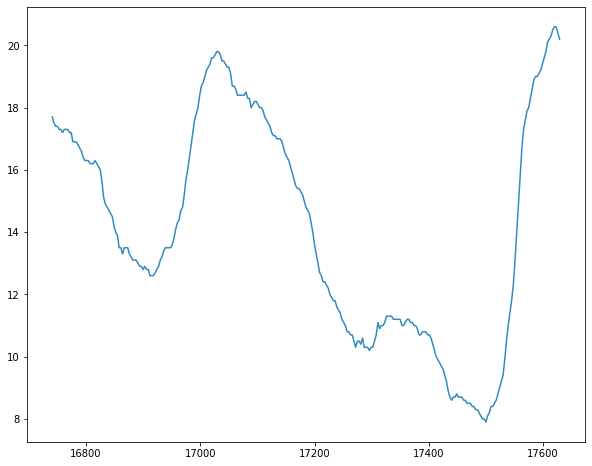

In [78]:
spain['unemployment_rate'].plot(figsize=(10, 8), color='#348ABD')

Note that the values along the x-axis represent the indices associated with Spain in the sorted `unemployment` `DataFrame`. Wouldn't it be nice if, instead, we could **show the time period** associated with the various unemployment rates for Spain? It might also be interesting to **compare** Spain's unemployment rate with its neighbor to the west, Portugal.

Let's first create a `DataFrame` that contains the unemployment data for both countries.

In [79]:
ps = unemployment[(unemployment['name_en'].isin(['Portugal', 'Spain'])) &
                  (unemployment['seasonality'] == 'sa')]

Next, we'll **generate time series data** by converting our years and months into `datetime` objects. `pandas` provides a `to_datetime()` function that makes this relatively simple. It converts an argument&mdash;a single value or an array of values&mdash;to `datetime`. (Note that the return value [depends on the input](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html).) If we were interested in March 23, 1868, for example, we could do the following.

In [80]:
pd.to_datetime('1868/3/23')

Timestamp('1868-03-23 00:00:00')

The argument doesn't necessarily have to be specified in the `yyyy/mm/dd` format. You could list it as `mm/dd/yyyy`, but it's a good idea to be explicit. As a result, we pass in a valid string format.

In [81]:
pd.to_datetime('3/23/1868', format='%m/%d/%Y')

Timestamp('1868-03-23 00:00:00')

Let's create the `datetime` object and add it to the `DataFrame` as a column named `date`. For this, we'll use the `DataFrame.insert()` method.

In [82]:
ps.insert(loc=0, column='date',
          value=pd.to_datetime(ps['year'].astype(str) + '/' + ps['month'].astype(str) + '/1'))

Finally, let's only keep certain columns, rename them, and reshape the `DataFrame`.

In [83]:
ps = ps[['date', 'name_en', 'unemployment_rate']]
ps.columns = ['Time Period', 'Country', 'Unemployment Rate']
ps = ps.pivot(index='Time Period', columns='Country', values='Unemployment Rate')
ps.tail()

Country,Portugal,Spain
Time Period,,
2010-08-01,11.1,20.5
2010-09-01,11.1,20.6
2010-10-01,11.0,20.6
2010-11-01,10.9,20.4
2010-12-01,10.9,20.2


In [84]:
ps.head()

Country,Portugal,Spain
Time Period,,
1983-01-01,7.5,NaN
1983-02-01,7.6,NaN
1983-03-01,7.7,NaN
1983-04-01,7.9,NaN
1983-05-01,8.0,NaN


Notice the indices.

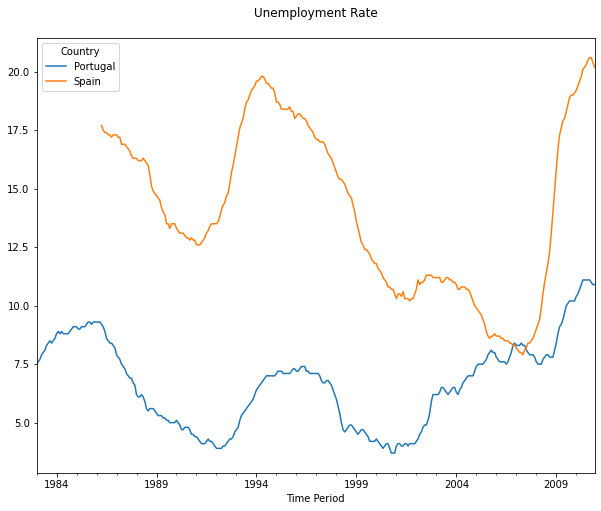

In [85]:
ps.plot(figsize=(10, 8), title='Unemployment Rate\n')

### Challenge 8: Plot without missing values
Note that there are some dates for which we lack data on Spain's unemployment rate. What could you do if you wanted your plot to show only dates where both Spain and Portugal have a defined unemployment rate?

In [86]:
ps

Country,Portugal,Spain
Time Period,,
1983-01-01,7.5,NaN
1983-02-01,7.6,NaN
1983-03-01,7.7,NaN
1983-04-01,7.9,NaN
1983-05-01,8.0,NaN
...,...,...
2010-08-01,11.1,20.5
2010-09-01,11.1,20.6
2010-10-01,11.0,20.6


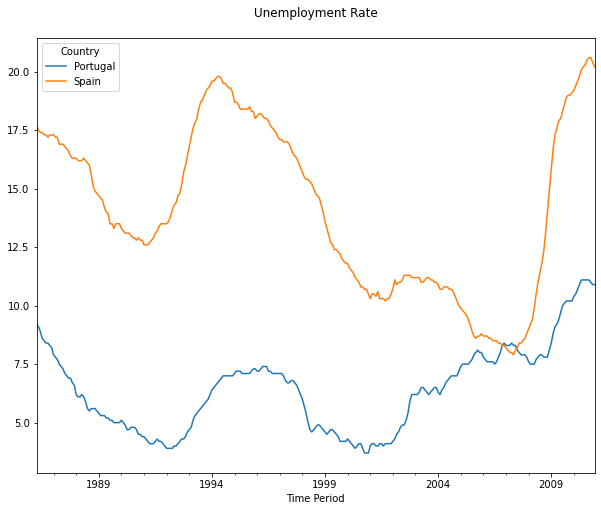

In [87]:
# dropping missing values
ps.dropna(subset=['Spain'], inplace= True)
ps.dropna(subset=['Portugal'],inplace=True)
ps.plot(figsize=(10, 8), title='Unemployment Rate\n')



Copyright Statement: Copyright © 2020 Christoforou. The materials provided by the instructor of this course, including this notebook, are for the use of the students enrolled in the course. Materials are presented in an educational context for personal use and study and should not be shared, distributed, disseminated or sold in print — or digitally — outside the course without permission. You may not, nor may you knowingly allow others to reproduce or distribute lecture notes, course materials as well as any of their derivatives without the instructor's express written consent.